<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
raw_data = pd.read_excel('titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


pclass	선실의 등급, 1등급이 가장 좋은 객실 사용, 3등급이 제일 저렴
survived 생존 여부 1이 생존 0이 미생존
age 나이
sibsp 함께 탑승한 형제자매 또는 배우자 수
parch 함께 탑승한 부모나 자녀의 수
fare 요금



In [ ]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


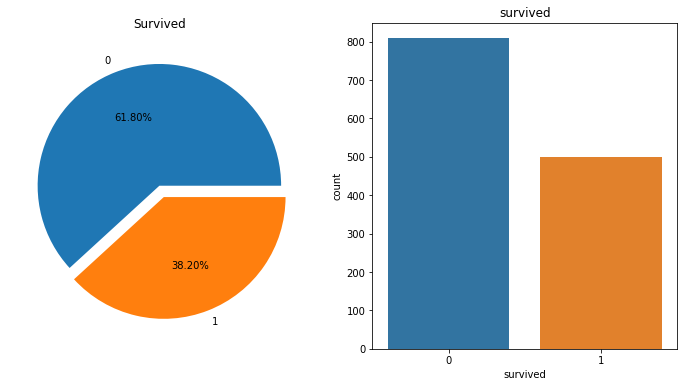

In [ ]:
####  생존률  ####

f,ax = plt.subplots(1,2,figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('survived')
plt.show()
# raw_data의 전체 탑승객 정보 중에서 survived 정보를 파이 그래프로 그렸다. value_counts()를 이용하면 
# 해당 항목의 숫자를 합쳐서 바로 그림을 그린다. 생존률이 38.2%임을 파이그래프로 알 수 있고
# 그 수는 약 500명임을 알 수 있다. 

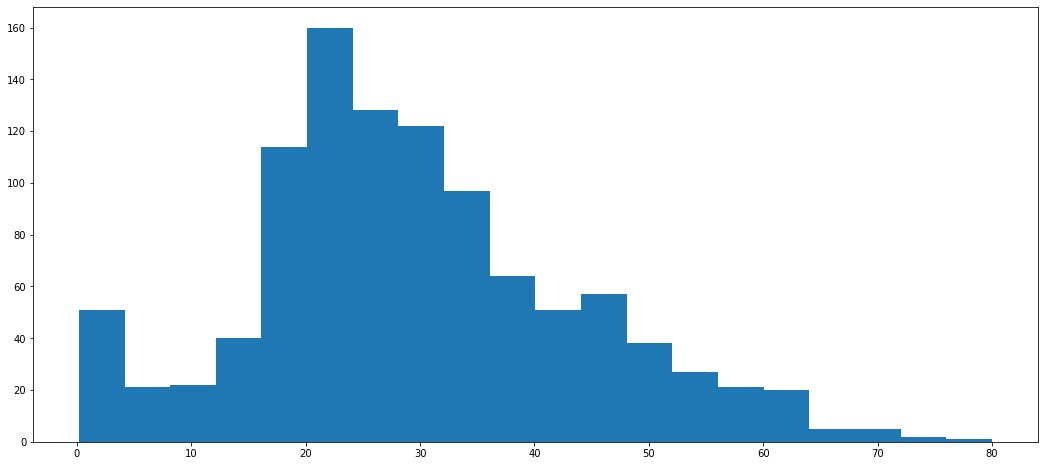

In [ ]:
#### 나이대 분석 ####

raw_data['age'].hist(bins=20,figsize=(18,8), grid=False)

# age 항목의 히스토그램을 그렸다. 0세에서 4-5 살 사이 아이들의 숫자가 다른 다이대의 아이들의 숫자에 비해 많음을 알수 있다. 
# 실제 타이타닉에는 아메리칸 드림을 꿈꾸고 아기를 안고 가족단위로 탑승한 가난한 가족이 많았다고 한다.  

In [ ]:
raw_data.groupby('pclass').mean()
# groupby 를 사용하면 지정된 컬럼을 index로 데이터를 재정렬 해준다. 
# 가장 비싼 1등실의 평균 연령이 가장 높고 3등실의 평균 연령이 가장 낮다. 
# 요금도 1등실이 가장 높다. 생존률도 1등실이 61.91%로 가장 높다.
# 상류층 사람이 많이 살아 남았다는 보인다. 
# 단순히 평균만으로는 정확한 분석을 할수 없다.   

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


Text(0.5, 1.0, 'Correlation between features')

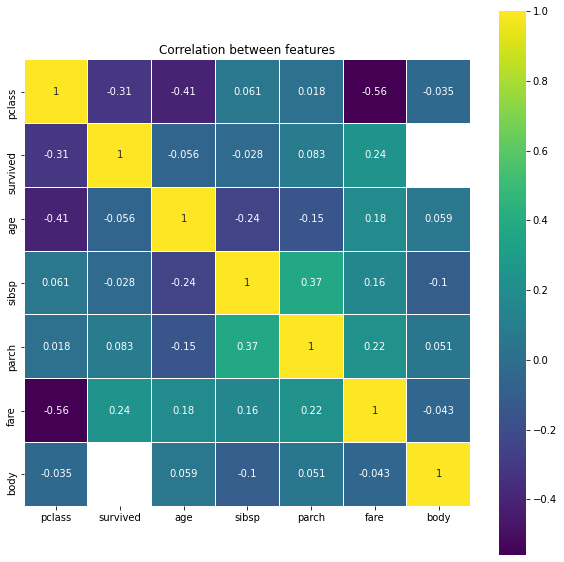

In [ ]:
# 상관계수 
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square = True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')

# pandas 가 제공하는 corr() 함수는 상관계수를 계산해주는 함수
# 상관계수는 seaborn의 heatmap과 함께 보면 시각적 효과가 좋다. 

# 선실등급 pclass 가 낮을 수록 생존율 survived 이 높아지는 관계
# 선실등급 pclass 가 낮을 수록 탑승객의 나이가 많아진다는 것을 볼수 있다. 

In [ ]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0,3,7,15,30,60,100],
                             labels=['baby','children','teenage','young','adult','old'])
raw_data.head()

# 나이등급 age_cat을 만들어서 구분해서 관찰을 한다. pandas의 cut함수를 사용해서
# 나이 기준을 만들고 각각에 라벨을 붙였다. 나이 데이터를 등급화하고 관찰해보자
 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [ ]:
raw_data.groupby('age_cat').mean()

# baby 등급에 가까운 연령대일수록 3등실에 많이 탑승했다. 이전의 분석 대로라면 
# baby등급의 생존률이 낮아야 하지만 이 결과에서는 baby등급의 생존률이 높다. 
# 오히려 adult 나 old로 갈수록 선실등급은 1등급에 가까와지지만 생존률은 낮아진다. 
# 이것이 '평균의 함정' 이다.

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


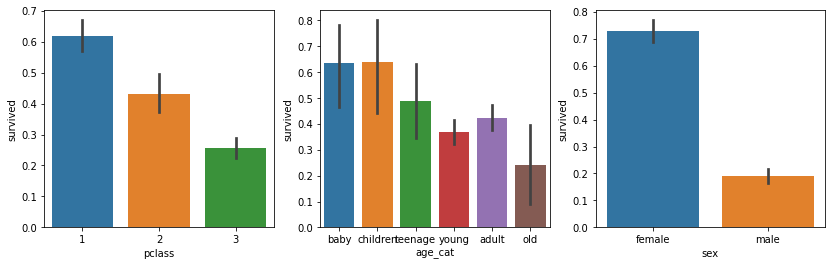

In [ ]:
%matplotlib inline
plt.figure(figsize = [14,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)

# 1등실이 가장 생존율이 높아 보이지만 나이가 어린 승객도 높은 생존율을 보이는 것을 
# 볼수 있다. 특히 여성의 생존율이 매우 높은 것을 알수 있다. 
# 기록에 따르면 타이타닉에 여성과 어린이를 먼저 구출한다는 원칙이 아주 잘 지켜진
# 경우임을 알수 있다. 자신의 생명을 여성/어린이에게 희생한 젊은 남성들이 많았다. 
# 부모 형제 없이 홀로 미국으로 떠난 가난한 (3등실탑승객) 남성들이 많았다. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex : Survived vs Dead')

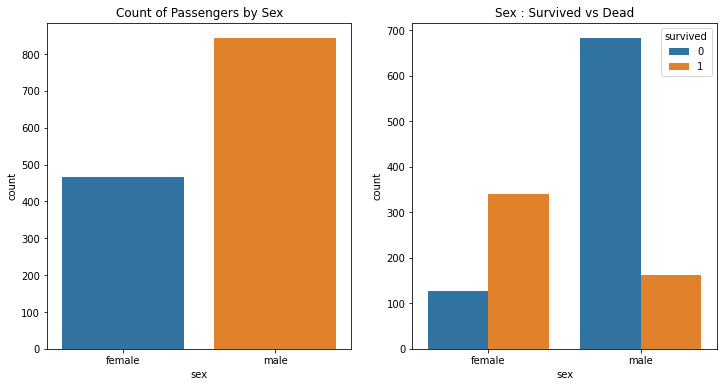

In [ ]:
# 탑승 성별  생존 성별 

f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

# 여성과 남성의 생존 상황을 좀 더 자세히 보면 여성의 탑승객은 450명 남성은 850명 쯤으로
# 여성이 남성의 약 절반 그런데 생존 자체는 여성이 350명이 조금 안되는 수로 150명 정도
# 생존한 남성 보다 훨신 많다. 여성/아이 우선 원칙이 아주 잘 지켜졌음을 데이터를 통해
# 엿볼 수 있다. 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived')

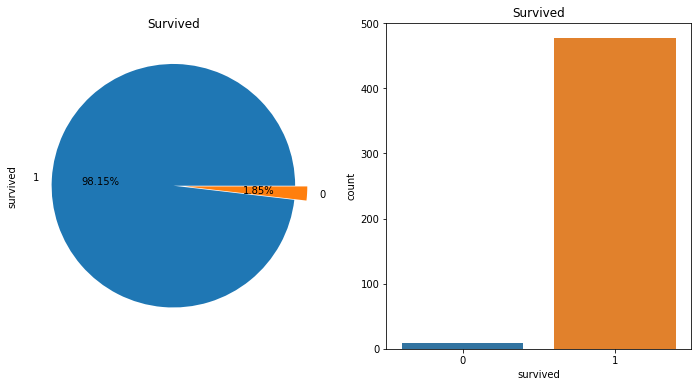

In [ ]:
# boat 칼럼은 숫자가 있으면 구명보트에 탑승한 사람이다. 

boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

# boat컬럼에 NaN이 아닌 항목만 추출, 즉 보트 탑승한 사람만 추출

f,ax = plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
                                                   autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('survived', data = boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
# 구명 보트에 탑승한 사람은 98.15% 가 생존했다. 
# 이 컬럼은 인공지능 분석할때는 사용을 하지 않는 게 좋다. 

In [ ]:
# 귀족들의 생존율 살펴보기 , 이름에는 호칭이 포함되어 있다. 

raw_data['name'][0]


'Allen, Miss. Elisabeth Walton'

In [ ]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [ ]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [ ]:
con_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(con_rare)

In [ ]:
titles = raw_data['title'].unique()
titles

# 호칭들을 추출해서 title이라는 칼럼을 만들고 유일한 값만 추출하는 unique()을 실행


array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [ ]:
pd.crosstab(raw_data['title'],raw_data['sex'])
# pandas 의 crosstab은 지정된 컬럼을 인덱스로 하고 두 번째 지정 칼럼에 대한 개수를
# 알려준다 여성중의 귀족은 Lady와 Countess

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [ ]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

In [ ]:
Rare = ['Lady','the Countess','Countess','Capt','Master','Col','Don','Dr','Major',
        'Rev','Sir','Jonkheer','Dona']

for each in Rare:
  raw_data['title'] = raw_data['title'].replace(each,'Rare')

In [ ]:
raw_data['title'].unique()

# Miss 다른말 Mlle Ms를 Miss 변경 replace 했고 Mme Mrs 변경했다. 
# 귀족등급은 모두 Rare라는 리스트형 변수를 사용해서 변경했다. 

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [ ]:
print(raw_data[['title','survived']].groupby(['title'], as_index=False).mean())

# 단순히 상류층rare 이라고 해서 생존율이 높다고 말하기는 어렵다. 

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


In [ ]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [ ]:
##### AI 분석 ##### 
# 결정나무 알고리즘을 적용해서 모델링 해보자 

In [ ]:
# 성별 숫자로 변경
# 성별 sex에서 여성이면 0, 남성이면 1 비어있으면 Nan 을 리스트에 추가

tmp = []
for each in raw_data['sex'] :
  if each == 'female':
    tmp.append(0)
  elif each == 'male':
    tmp.append(1)
  else:
    tmp.append(np.nan)

In [ ]:
raw_data['sex'] = tmp
raw_data.head()

# 성별 sex컬럼을 갱신했다
# 중요한 특징을 선택해서 분석에 사용한다. 여기서는 선실 pclass와 성별 sex 를 특징으로 잡는다. 
# 추가로 sibsp 형제와 배우자 parch 부모/자녀 포함한다. 
# 구명 보트는 특징으로 잡아서는 곤란하다. 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [ ]:
# 카테고리 자료형을 숫자로 변환한다. 

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [ ]:
# 결측치 제거 

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

In [ ]:
#### 생존자 예측 모델 ####
#인공지능이나 머신러닝에서 중요한 기법중의 하나는 데이터를 훈련용과 검증용으로 나누는 것이다. (약 10%)

train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]

In [ ]:
train_pre   # 학습에 특징으로 사용할 열들의 데어터만 추출  

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
...,...,...,...,...,...,...
1301,3.0,1.0,45.5000,0.0,0.0,7.2250
1304,3.0,0.0,14.5000,1.0,0.0,14.4542
1306,3.0,1.0,26.5000,0.0,0.0,7.2250
1307,3.0,1.0,27.0000,0.0,0.0,7.2250


In [ ]:
# 학습용과 검증용 데이터셋을 분리 
# 나중에 모델 검증용으로 사용
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_pre,
                                                    raw_data[['survived']],
                                                    test_size = 0.1,
                                                    random_state=13)
# train_test_split 함수는 데이터를 훈련용과 검증용으로 나눈다. 
# 전체 데이터의 10% 를 text로 두고 훈련용 데이터 X_train 와 
# 훈련용 데이터의 라벨 raw_data[['survived]],검증용 데이터 X_test와 라벨을 분리
# 훈련용 데이터로 모델을 만들고 그 모델로 검증용 데이터를 확인한다.  

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [ ]:
# index 초기화, 0부터 설정
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)



In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0,0.0,0.0,7.7500
1,2.0,1.0,34.0,0.0,0.0,13.0000
2,3.0,0.0,38.0,1.0,5.0,31.3875
3,2.0,1.0,31.0,0.0,0.0,13.0000
4,1.0,0.0,63.0,1.0,0.0,221.7792


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score : {}'.format(tree_clf.score(X_train, y_train)))

# 훈련용 데이터의 정확도 는 81.17 % 

Score : 0.8117021276595745


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred) *100 )

# 테스트 데이터로 정확도를 확인할 결과 84.76% 가 나왔다. 

Test Accuracy is  84.76190476190476


In [ ]:
# 등급, 성, 나이, 친척, 부모자녀, 요금
dica = [3.,1.,19,0,0,5.]
win = [1.,0.,17,1.,1.,100.]


In [ ]:
tree_clf.predict_proba([win])

# 비생존 확률 / 생존확률

array([[0.02419355, 0.97580645]])

In [ ]:
tree_clf.predict_proba([dica])

array([[0.875, 0.125]])